In [111]:
import sys

sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse.linalg import eigsh
import src.fem_1d_eigen
import importlib

importlib.reload(src.fem_1d_eigen)
from src.fem_1d_eigen import *

In [112]:
xs = np.linspace(0, 1, 100)
v = np.zeros_like(xs)
dirichlet_bc = np.array([0, 0])
femeig = Fem1dEigen(xs, v, dirichlet_bc)
K = femeig.get_K()
M = 2 * femeig.get_M()

In [125]:
xs = xs
xs_next = np.roll(xs, -1)  # 次の座標点
element_lengths = xs_next - xs  # 要素の長さ
element_lengths = element_lengths[:-1]  # 最後の要素は不要
element_lengths

array([0.01010101, 0.01010101, 0.01010101, 0.01010101, 0.01010101,
       0.01010101, 0.01010101, 0.01010101, 0.01010101, 0.01010101,
       0.01010101, 0.01010101, 0.01010101, 0.01010101, 0.01010101,
       0.01010101, 0.01010101, 0.01010101, 0.01010101, 0.01010101,
       0.01010101, 0.01010101, 0.01010101, 0.01010101, 0.01010101,
       0.01010101, 0.01010101, 0.01010101, 0.01010101, 0.01010101,
       0.01010101, 0.01010101, 0.01010101, 0.01010101, 0.01010101,
       0.01010101, 0.01010101, 0.01010101, 0.01010101, 0.01010101,
       0.01010101, 0.01010101, 0.01010101, 0.01010101, 0.01010101,
       0.01010101, 0.01010101, 0.01010101, 0.01010101, 0.01010101,
       0.01010101, 0.01010101, 0.01010101, 0.01010101, 0.01010101,
       0.01010101, 0.01010101, 0.01010101, 0.01010101, 0.01010101,
       0.01010101, 0.01010101, 0.01010101, 0.01010101, 0.01010101,
       0.01010101, 0.01010101, 0.01010101, 0.01010101, 0.01010101,
       0.01010101, 0.01010101, 0.01010101, 0.01010101, 0.01010

In [114]:
val, vec = eigsh(K, k=3, M=M, which="SM")

In [116]:
np.linalg.norm(vec[:, 0])

7.071649407797892

In [120]:
np.pi**2 / 2

4.934802200544679

In [121]:
np.linalg.norm(vec[:, 1])

7.073394482565811

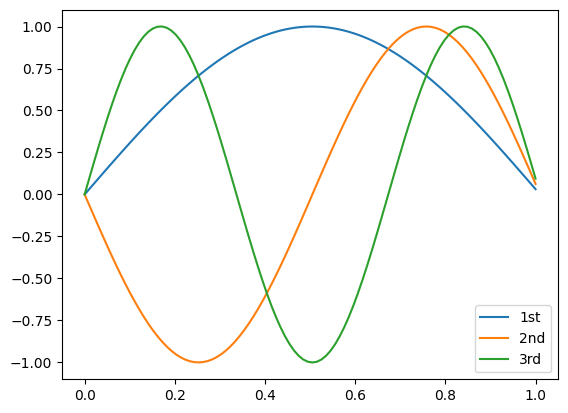

In [119]:
fig, ax = plt.subplots()
ax.plot(xs, np.insert(vec[:, 0], 0, dirichlet_bc[0]), label="1st")
ax.plot(xs, np.insert(vec[:, 1], 0, dirichlet_bc[0]), label="2nd")
ax.plot(xs, np.insert(vec[:, 2], 0, dirichlet_bc[0]), label="3rd")
ax.legend()